In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint 
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydot
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

tempIemisions = pd.read_csv("DataSetFinal.csv", index_col=0)
dummiesCountry=pd.get_dummies(tempIemisions['Country'],drop_first=1)
tempIemisions=pd.concat([tempIemisions,dummiesCountry],axis=1)
tempIemisions=tempIemisions.drop(['Country'], axis=1)

#fem X totes les columnes menys temp i y nomes temp el axis=1 es per indicar
#que es una label de les columnes
X = tempIemisions.drop('AverageTemperature', axis=1)
y = tempIemisions['AverageTemperature']

#dividim el dataSet en test 20% i entrenament 80%
#el random_state es la llavor que s'utilitzarà per randomitzar 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

E:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#creem l'algorisme del arbre de decisions i l'entrenem
regressor = DecisionTreeRegressor(max_depth=475,min_samples_leaf=4,min_samples_split=23)
regressor.fit(X_train,y_train)


#fem les prediccions
y_predDT = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predDT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predDT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predDT)))
comparacioDTR=pd.DataFrame({'Actual':y_test, 'Predicted':y_predDT})

Mean Absolute Error: 1.365430105522179
Mean Squared Error: 3.427390273425217
Root Mean Squared Error: 1.851321223727859


In [3]:
#creem l'algorisme del SVM i l'entrenem
clf = svm.SVR(kernel='rbf',C=4)
clf.fit(X_train, y_train)
y_predSVM = clf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predSVM))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predSVM))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predSVM)))
comparacioSVM=pd.DataFrame({'Actual':y_test, 'Predicted':y_predSVM})

Mean Absolute Error: 7.140475201272051
Mean Squared Error: 90.5878895635302
Root Mean Squared Error: 9.517767047135068


In [4]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(bootstrap = True, max_depth = 172, min_samples_leaf = 3, min_samples_split = 12,
                           n_estimators = 1143, random_state = 28)
rf.fit(X_train, y_train)
y_predRT = rf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predRT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predRT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predRT)))
comparacioRF=pd.DataFrame({'Actual':y_test, 'Predicted':y_predRT})

Mean Absolute Error: 1.2841193979350016
Mean Squared Error: 2.901036478517489
Root Mean Squared Error: 1.7032429299772505


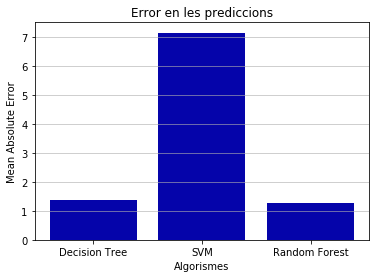

<Figure size 432x288 with 0 Axes>

In [5]:
maeAlgs={"Decision Tree":1.36, "SVM":7.14, "Random Forest":1.28}

plt.bar(range(len(maeAlgs)), list(maeAlgs.values()), align='center',color='#0504aa')
plt.xticks(range(len(maeAlgs)), list(maeAlgs.keys()))
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Algorismes")
plt.ylabel("Mean Absolute Error")
plt.title("Error en les prediccions")
plt.show()
plt.savefig('comparacioMetricsAlgs.png')

In [6]:
tempsReals = []
tempsRF = []
tempsSVM = []
tempsDT = []
i=1
for row in y_test:
    if (i < 20):
        tempsReals.append(row)
    i += 1
i=1
for row in y_predRT:
    if (i < 20):
        tempsRF.append(row)
    i += 1
i=1
for row in y_predSVM:
    if (i < 20):
        tempsSVM.append(row)
    i += 1
i=1
for row in y_predDT:
    if (i < 20):
        tempsDT.append(row)
    i += 1

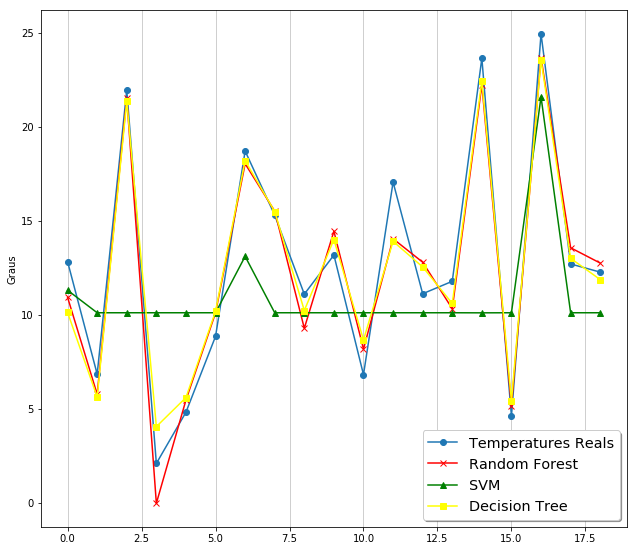

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 9.5)
plt.plot(tempsReals,marker='o',label = 'Temperatures Reals')
plt.plot(tempsRF,marker='x', color = 'red', label = 'Random Forest')
plt.plot(tempsSVM,marker='^', color = 'green', label = 'SVM')
plt.plot(tempsDT,marker='s', color = 'yellow', label = 'Decision Tree')
plt.grid(axis='x', alpha=0.75)
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.ylabel('Graus')
plt.show()
plt.savefig('comparacioAlgs.png')